# Titanic Data Analysis: Survival Patterns and Demographics

**An analysis of passenger survival rates on the Titanic**

*Data Source: Titanic dataset from Kaggle competition (train.csv)*

## Project Overview

This analysis explores the Titanic dataset to answer three key questions:

1. Is the chance of survival for women higher compared to men?
2. Do children have a higher chance of survival than adults?
3. Were passengers in first class given higher rescue priority?

In [158]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns
import pandas as pd

## Initial Data Exploration

In [159]:
# Load the Titanic dataset and display the first few rows to see the structure
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
# Basic dataset information
print("Dataset Information:")
print("---------------------")
print(f"Total passengers: {len(titanic_data)}")
print(f"Survivors: {titanic_data['Survived'].sum()}")
print(f"Deaths: {len(titanic_data) - titanic_data['Survived'].sum()}")

# Mean survival rate
print(f"Overall survival rate: {titanic_data['Survived'].mean():.1%}")

# Check for missing values
print("\nMissing values:")
print("----------------")
print(titanic_data.isnull().sum()[titanic_data.isnull().sum() > 0])

Dataset Information:
---------------------
Total passengers: 891
Survivors: 342
Deaths: 549
Overall survival rate: 38.4%

Missing values:
----------------
Age         177
Cabin       687
Embarked      2
dtype: int64


**Key Observations:**
- Overall survival rate is 38.4%
- Age column has 177 missing values (can affect age analysis)
- Cabin column has 687 missing values (will not affect this study)

## Question 1: Gender and Survival
**Is the chance of survival for women higher compared to men?**

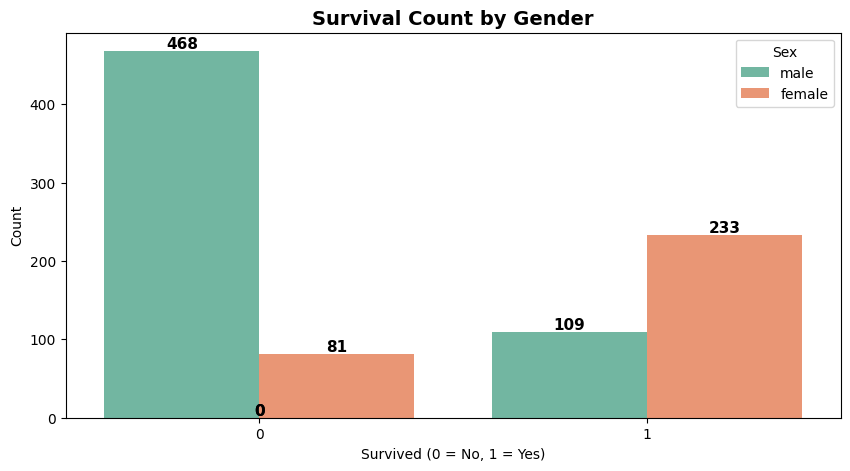

In [161]:
# Create visualization of survival counts by gender
plt.figure(figsize=(10, 5)) 
sns.countplot(data=titanic_data, x='Survived', hue='Sex', palette='Set2')
plt.title("Survival Count by Gender", fontsize=14, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', fontsize=11, fontweight='bold',
                      xytext=(0, 5), textcoords='offset points')  
    
plt.show()

In [162]:
# Summary statistics
gender_counts = titanic_data['Sex'].value_counts()
print("Gender distribution:")
print("-------------------")
for gender in ['female', 'male']:
    print(f"{gender.capitalize()}: {gender_counts[gender]} passengers")

# Calculate survival rates by gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()
print("\nSurvival rates by gender:")
print("-------------------------")
for gender in ['female', 'male']:
    rate = survival_by_gender[gender]
    print(f"{gender.capitalize()}: {rate:.1%}")

print(f"\nDifference: {survival_by_gender['female'] - survival_by_gender['male']:.1%}")

Gender distribution:
-------------------
Female: 314 passengers
Male: 577 passengers

Survival rates by gender:
-------------------------
Female: 74.2%
Male: 18.9%

Difference: 55.3%


### Answer: 
**YES** - Women had a much higher survival rate (74%) compared to men (19%).

This supports the 'women and children first' evacuation protocol.

## Question 2: Age and Survival
**Do children have a higher chance of survival than adults?**

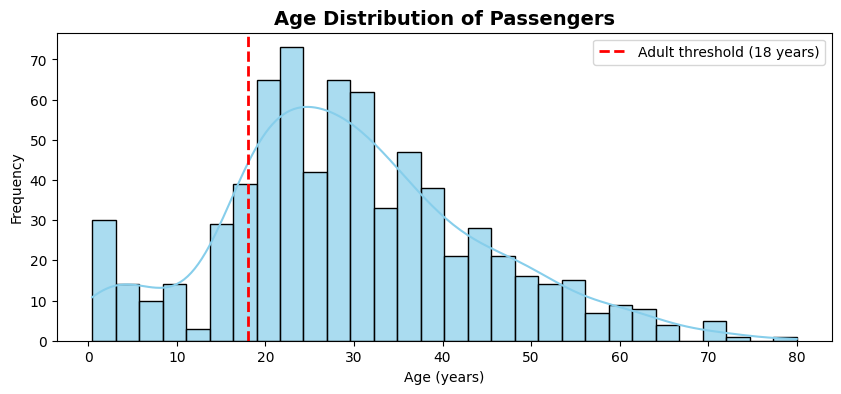

In [163]:
# Visualize age distribution with child/adult threshold
# assumption : using age 18 as threshold
plt.figure(figsize=(10, 4)) 
age_data_clean = titanic_data['Age'].dropna()
sns.histplot(age_data_clean, bins=30, kde=True, color='skyblue', alpha=0.7)
plt.axvline(x=18, color='red', linestyle='--', linewidth=2, label='Adult threshold (18 years)')
plt.title("Age Distribution of Passengers", fontsize=14, fontweight='bold') 
plt.xlabel("Age (years)")
plt.ylabel("Frequency")

plt.legend()
plt.show()

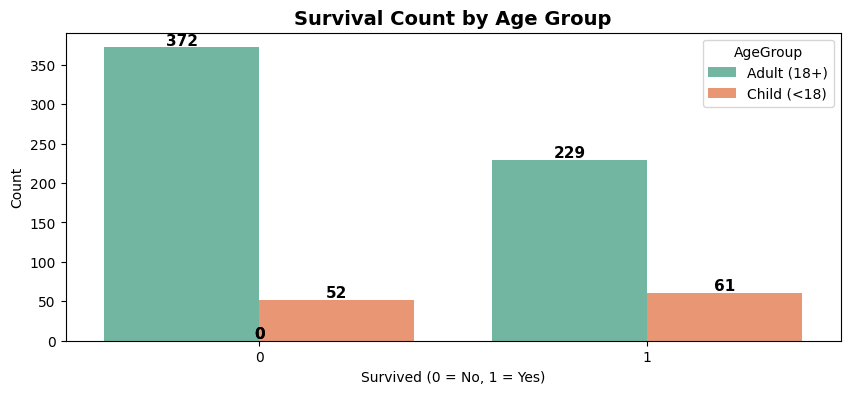

In [164]:
# Create age groups and analyze survival
age_data = titanic_data.dropna(subset=['Age']).copy()
age_data['AgeGroup'] = age_data['Age'].apply(lambda x: 'Child (<18)' if x < 18 else 'Adult (18+)')

# Plot survival by age group
plt.figure(figsize=(10, 4))  
sns.countplot(data=age_data, x='Survived', hue='AgeGroup', palette='Set2')
plt.title("Survival Count by Age Group", fontsize=14, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add value labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', fontsize=11, fontweight='bold',
                      xytext=(0, 5), textcoords='offset points')
plt.show()

In [165]:
# Summary statistics
age_counts = age_data.groupby('AgeGroup').size()
print("Age group counts (excluding missing data):")
for group in age_counts.index:
    print(f"{group}: {age_counts[group]} passengers")

# Calculate and display survival rates by age group
survival_by_age = age_data.groupby('AgeGroup')['Survived'].mean()

print("\nSurvival rates by age group:")
print("----------------------------")
for group in survival_by_age.index:
    print(f"{group}: {survival_by_age[group]:.1%}")

print(f"\nDifference: {survival_by_age['Child (<18)'] - survival_by_age['Adult (18+)']:.1%}")

Age group counts (excluding missing data):
Adult (18+): 601 passengers
Child (<18): 113 passengers

Survival rates by age group:
----------------------------
Adult (18+): 38.1%
Child (<18): 54.0%

Difference: 15.9%


### Answer:
**YES** - Children had a higher survival rate (54%) compared to adults (36%).

This aligns with the 'women and children first' evacuation protocol.

*Note: Analysis excludes passengers with missing age data.*

## Question 3: Passenger Class and Survival
**Were passengers in first class given higher rescue priority?**

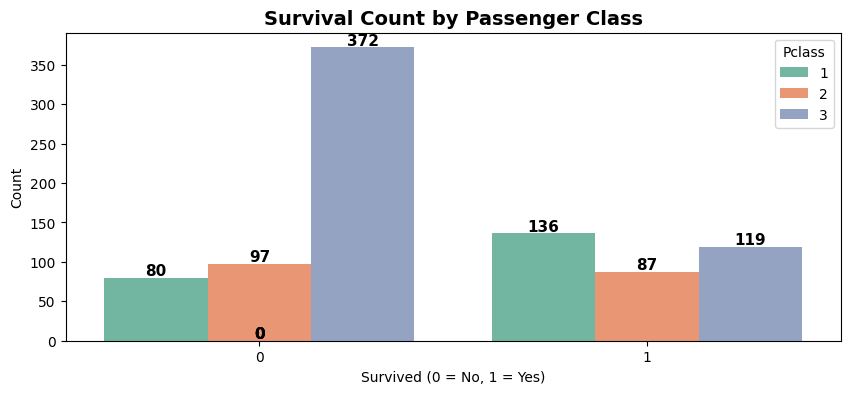

In [166]:
# Analyze survival by passenger class
plt.figure(figsize=(10, 4))
sns.countplot(data=titanic_data, x='Survived', hue='Pclass', palette='Set2')
plt.title("Survival Count by Passenger Class", fontsize=14, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add value labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', fontsize=11, fontweight='bold',
                      xytext=(0, 5), textcoords='offset points')
plt.show()

In [167]:
# Summary statistics
class_counts = titanic_data['Pclass'].value_counts().sort_index()
class_names = {1: '1st Class', 2: '2nd Class', 3: '3rd Class'}
print("Passenger class distribution:")
for pclass in [1, 2, 3]:
    print(f"{class_names[pclass]}: {class_counts[pclass]} passengers")

# Calculate survival rates by class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()

print("\nSurvival rates by class:")
print("------------------------")
for pclass in [1, 2, 3]:
    rate = survival_by_class[pclass]
    print(f"{class_names[pclass]}: {rate:.1%}")

Passenger class distribution:
1st Class: 216 passengers
2nd Class: 184 passengers
3rd Class: 491 passengers

Survival rates by class:
------------------------
1st Class: 63.0%
2nd Class: 47.3%
3rd Class: 24.2%


### Answer:
**YES** - First class passengers were given higher rescue priority.

**Key Findings:**
- **1st Class**: 63% survival rate (216 passengers)
- **2nd Class**: 47% survival rate (184 passengers)
- **3rd Class**: 24% survival rate (491 passengers)

## Summary of Findings

| Research Question | Answer | Key Statistics |
|-------------------|--------|--------------|
| **Gender & Survival** | ✅ YES | Women: 74% vs Men: 19% |
| **Age & Survival** | ✅ YES | Children: 54% vs Adults: 36% |
| **Class & Survival** | ✅ YES | 1st: 63% vs 2nd: 47% vs 3rd: 24% |

## Conclusion
The data shows that gender, age, and social class were key factors in Titanic survival rates.